In [1]:
import pandas as pd

file_path = r"C:\Users\hp\Desktop\excel sheets\kise recommends.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)
df.isnull().sum()
df.isnull().sum()
df.isnull().sum()
import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)      # Remove numbers
        return text
    return ""


df['What additional or recommendations support would you like KISE to offer  '] = df['What additional or recommendations support would you like KISE to offer  '].apply(clean_text)

df.head()


,What additional or recommendations support would you like KISE to offer
0,parent counselling and social services for wel...
1,open more doors to people
2,more information
3,to have talent academies
4,more opportunities to the children


In [2]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) # Use English stop words
df['What additional or recommendations support would you like KISE to offer  '] = df['What additional or recommendations support would you like KISE to offer  '].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

all_words = " ".join(df['What additional or recommendations support would you like KISE to offer  ']).split()
word_counts = Counter(all_words)
print(word_counts.most_common(20))  # Top 20 words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


[('children', 16), ('parents', 11), ('therapy', 6), ('schools', 5), ('support', 5), ('disability', 5), ('services', 4), ('people', 4), ('training', 4), ('please', 4), ('help', 4), ('best', 4), ('counselling', 3), ('empowerment', 3), ('education', 3), ('school', 3), ('autistic', 3), ('adults', 3), ('train', 3), ('give', 3)]


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


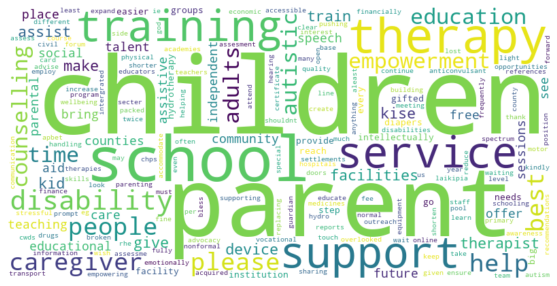

[(('institution', 'reach', 'people', 'disability'), 2), (('parent', 'counselling', 'social', 'services'), 1), (('counselling', 'social', 'services', 'wellbeing'), 1), (('assistive', 'devices', 'clear', 'parents'), 1), (('devices', 'clear', 'parents', 'empowerment'), 1), (('clear', 'parents', 'empowerment', 'program'), 1), (('shorten', 'wait', 'time', 'hydro'), 1), (('wait', 'time', 'hydro', 'therapy'), 1), (('time', 'hydro', 'therapy', 'sessions'), 1), (('prompt', 'sharing', 'assessme', 'reports'), 1), (('sharing', 'assessme', 'reports', 'parents'), 1), (('offer', 'vocational', 'place', 'adults'), 1), (('vocational', 'place', 'adults', 'spectrum'), 1), (('anticonvulsant', 'drugs', 'transport', 'attend'), 1), (('drugs', 'transport', 'attend', 'therapy'), 1), (('transport', 'attend', 'therapy', 'free'), 1), (('attend', 'therapy', 'free', 'counselling'), 1), (('therapy', 'free', 'counselling', 'therapy'), 1), (('free', 'counselling', 'therapy', 'parents'), 1), (('counselling', 'therapy', 

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['What additional or recommendations support would you like KISE to offer  '])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

import nltk
from nltk.util import ngrams  # Import the ngrams function
from collections import Counter
def get_ngrams(text, n):
    if isinstance(text, str):
        tokens = text.split()
        return list(ngrams(tokens, n))
    else:
        return []

bigrams = []
for text in df['What additional or recommendations support would you like KISE to offer  ']:
    bigrams.extend(get_ngrams(text, 4))  # Get pairs of words

bigram_counts = Counter(bigrams)
print(bigram_counts.most_common(20))

In [4]:
import textblob
from textblob import TextBlob
import os

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['What additional or recommendations support would you like KISE to offer  '].apply(get_sentiment)
df[['What additional or recommendations support would you like KISE to offer  ', 'Sentiment']].head()

file_path = "kiseimprovemen.xlsx"
df.to_excel(file_path, index=False)
print(f"Attendance file saved to: {os.path.abspath(file_path)}")

Attendance file saved to: C:\Users\hp\kiseimprovemen.xlsx


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['What additional or recommendations support would you like KISE to offer  '])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-12:]]
    print(f"Topic {index+1}: {', '.join(words)}")

Topic 1: educational, therapy, offer, diapers, sessions, schools, school, time, caregiver, step, needs, children
Topic 2: adults, schools, social, services, reach, institution, gifted, intellectually, autistic, people, children, disability
Topic 3: care, hydrotherapy, caregivers, assistive, devices, assist, counselling, empowerment, training, therapy, children, parents
Topic 4: starter, sign, language, parental, kise, counties, provide, train, schools, support, parents, children
Topic 5: speech, services, people, aid, big, easier, place, facilities, make, help, education, best


In [ ]:
pairs = {
    "Drizz & Trappy": ["drizz", "trappy", "drizzgb"],
    "F-Don & Dan Dannah": ["f-don", "f don", "dan dannah", "dannah"]
}
keywords = ["won", "took it", "winning"]
pair_won_counts = {}

for pair_name, terms in pairs.items():
    # Filter comments that mention the pair and the word "won"
    filtered_comments = df[
        df["Comments"].apply(lambda x: any(term in x.lower() for term in terms)) &
        df["Comments"].str.lower().str.contains(keyword)
    ]
    # Count the number of matching comments
    pair_won_counts[pair_name] = len(filtered_comments)

print(pair_won_counts)